# Predicting Nigeria House Prices Using ML

**Project Description:**
Exploring the Nigerian house dataset, in this project we will be performing
Data Cleaning, Exploratory Data Analysis and finally building a model to
predict the price of a house based on the features in the dataset

### Import Libraries

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import Dataset

In [9]:
df = pd.read_csv('nigeria_houses_data.csv')
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


### Understanding the Dataset

In [10]:
# shape
df.shape

(24326, 8)

* The dataset contains 24,326 records and 8 features

In [11]:
# descriptive stats
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [12]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


* There is no missing values and all features are in the appropriate type

In [17]:
# correlation
df.corr()

ValueError: could not convert string to float: 'Detached Duplex'

In [14]:
# visualize the correlation
sns.heatmap(df.corr(), annot=True)
plt.title("Correlations of Dataset")
plt.show()

ValueError: could not convert string to float: 'Detached Duplex'

**Total Numbers of Properties**

In [18]:
len(df)

24326

**Unique Titles of Properties**

In [19]:
for t in df['title'].unique():
    print(f"* {t}")

# print length
print(f"\nThere are {len(df['title'].unique())} unique titles.")

* Detached Duplex
* Terraced Duplexes
* Semi Detached Duplex
* Detached Bungalow
* Block of Flats
* Semi Detached Bungalow
* Terraced Bungalow

There are 7 unique titles.


**Unique States of Properties**

In [20]:
for s in df['state'].unique():
    print(f"* {s}")

# print length
print(f"\nThere are {len(df['state'].unique())} unique states.")

* Abuja
* Lagos
* Edo
* Ogun
* Oyo
* Imo
* Anambara
* Rivers
* Enugu
* Kaduna
* Kwara
* Nasarawa
* Abia
* Delta
* Akwa Ibom
* Osun
* Ekiti
* Cross River
* Kogi
* Plateau
* Kano
* Katsina
* Bayelsa
* Borno
* Niger

There are 25 unique states.


**Unique Town of Properties**

In [21]:
for t in df['town'].unique():
    print(f"* {t}")

# print length
print(f"\nThere are {len(df['town'].unique())} unique towns.")

* Mabushi
* Katampe
* Lekki
* Ajah
* Epe
* Lokogoma District
* Oredo
* Victoria Island (VI)
* Mowe Ofada
* Ikeja
* Ikoyi
* Magodo
* Kaura
* Galadimawa
* Gwarinpa
* Abeokuta North
* Lugbe District
* Ibeju Lekki
* Yaba
* Sango Ota
* Ifako-Ijaiye
* Agege
* Ikorodu
* Jahi
* Ibadan
* Orozo
* Ifo
* Owerri North
* Guzape District
* Idu Industrial
* Owerri Municipal
* Isheri North
* Utako
* Port Harcourt
* Kuje
* Isheri
* Life Camp
* Ipaja
* Ado-Odo/Ota
* Dape
* Mushin
* Ejigbo
* Isolo
* Ojodu
* Gaduwa
* Enugu
* Dakwo
* Asokoro District
* Alimosho
* Sagamu
* Chikun
* Egbeda
* Wuye
* Kubwa
* Shomolu
* Ogudu
* Owerri West
* Ibafo
* Surulere
* Obio-Akpor
* Ayobo
* Apo
* Mowe Town
* Ibadan South-West
* Wuse 2
* Durumi
* Simawa
* Arepo
* Ikotun
* Oluyole
* Maitama District
* Maryland
* Ido
* Karsana
* Wuse
* Ilorin West
* Kurudu
* Karmo
* Abeokuta South
* KM 46
* Gbagada
* Idimu
* Kaduna South
* Magboro
* Gudu
* Kukwaba
* Mbora (Nbora)
* Obafemi Owode
* Jabi
* Karu
* Ojo
* Garki
* Aba
* Ogijo
* Asa

## Univariant Analysis

**Distribution of Prices** 

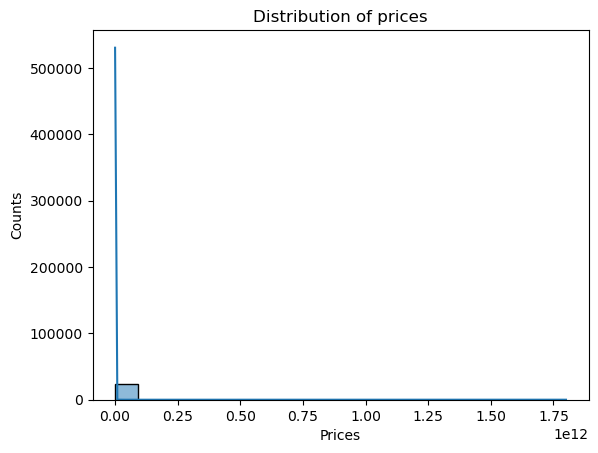

In [22]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of prices')
plt.xlabel('Prices')
plt.ylabel("Counts")
plt.show()

## Bivariate Analysis

**Count of Houses by State**

In [23]:
count_by_state  = df['state'].value_counts()[0:10]

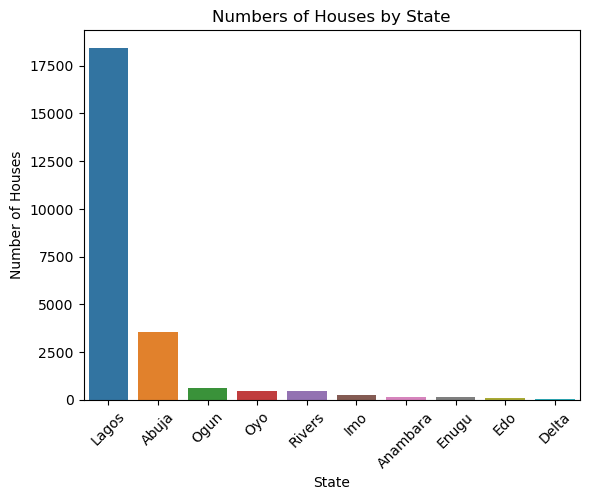

In [24]:
sns.barplot(x= count_by_state.index, y= count_by_state.values)
plt.title("Numbers of Houses by State")
plt.xlabel("State")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.show()

There are High numbers of Housing in Lagos, followed by Abuja and Ogun

**Count of Houses by Title**

In [25]:
count_by_title  = df['title'].value_counts()[0:10]

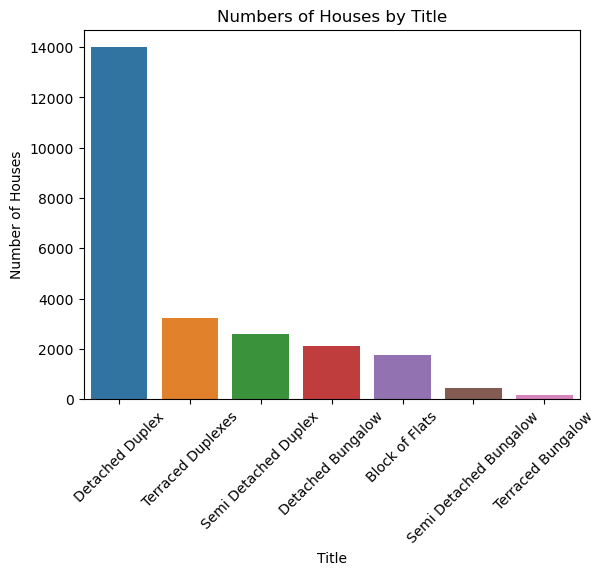

In [26]:
sns.barplot(x= count_by_title.index, y= count_by_title.values)
plt.title("Numbers of Houses by Title")
plt.xlabel("Title")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.show()

**Average Price by State**

In [27]:
avg_price_by_state = df[['state', 'price']].groupby(by=df['state']).mean().sort_values('price', ascending=False).reset_index()[0:10]

TypeError: Could not convert AbiaAbiaAbiaAbiaAbiaAbiaAbiaAbiaAbia to numeric

In [ ]:
avg_price_by_state

In [ ]:
sns.barplot(x=avg_price_by_state['state'], y=avg_price_by_state['price'])
plt.title("Average Prices by State")
plt.xlabel("State")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

**Average Price by Town**

**Average Price by Title**

## Model Building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder # for encoding

In [29]:
# create an object
he = OneHotEncoder()
he.fit(df)

OneHotEncoder()

In [33]:
new_df = pd.get_dummies(df,columns=['title','town','state'], dtype='int')
new_df.head()

,bedrooms,bathrooms,toilets,parking_space,price,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,450000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,800000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,120000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,40000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,75000000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# split data into dependent and Independent Feature
X = new_df.drop(columns=['price'])
X.head()

,bedrooms,bathrooms,toilets,parking_space,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
y = new_df['price']
y.head()

0    450000000.0
1    800000000.0
2    120000000.0
3     40000000.0
4     75000000.0
Name: price, dtype: float64

### Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

In [38]:
y_train.shape

(19460,)

In [39]:
X_test.shape

(4866, 225)

In [40]:
y_test.shape

(4866,)

### Train Model

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
print(f"Intercept {lm.intercept_}")

Intercept 1.1578568494954239e+20


In [48]:
print(f"Coefficients {lm.coef_}")

Coefficients [ 3.06018981e+08  1.58981898e+08 -1.34254851e+08  1.69092081e+08
 -1.13122243e+20 -1.13122243e+20 -1.13122243e+20 -1.13122243e+20
 -1.13122243e+20 -1.13122243e+20 -1.13122243e+20 -2.64633223e+17
 -2.86773425e+16 -2.86773429e+16 -1.06571142e+18 -1.21178490e+18
 -2.86773427e+16 -2.86773422e+16  7.55160741e+17 -2.86773423e+16
 -2.86773426e+16 -2.86773423e+16 -2.86773424e+16 -2.86773426e+16
 -2.86773426e+16 -2.86773428e+16 -1.06571142e+18 -2.86773422e+16
 -2.86773425e+16 -2.86773426e+16 -1.06571142e+18 -2.86773421e+16
 -2.86773423e+16 -2.86773427e+16 -2.86773422e+16 -1.24397017e+18
 -2.86773420e+16 -2.51885346e+16 -2.86773419e+16 -2.86773425e+16
 -1.17163146e+18 -2.86773424e+16 -2.86773422e+16 -6.25955907e+17
 -2.86773425e+16 -2.86773424e+16 -2.86773424e+16 -2.86773420e+16
 -2.36929214e+17 -2.86773424e+16 -2.86773418e+16 -9.44253583e+17
 -2.86773428e+16 -5.93287816e+17 -2.86773420e+16 -2.86773432e+16
 -9.97382210e+17 -2.86773420e+16 -1.06571142e+18 -2.86773421e+16
 -2.86773425

In [49]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef_df

,Coefficients
bedrooms,3.060190e+08
bathrooms,1.589819e+08
toilets,-1.342549e+08
parking_space,1.690921e+08
title_Block of Flats,-1.131222e+20
...,...
state_Ogun,-2.634764e+18
state_Osun,-2.426512e+18
state_Oyo,-2.634764e+18
state_Plateau,-1.443375e+18


### Predictions

In [50]:
y_pred = lm.predict(X_test)
y_pred

array([ 2.11845120e+08, -3.30874880e+08,  1.29571226e+09, ...,
        5.39869184e+08,  3.71900416e+08,  2.96075264e+08])

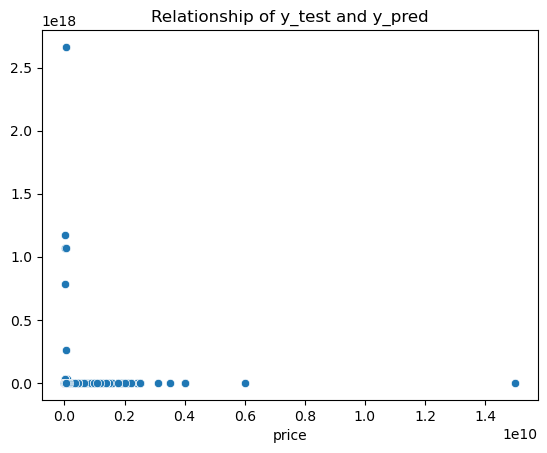

In [51]:
# compare the y_pred and y_test
sns.scatterplot(x = y_test, y = y_pred)
plt.title("Relationship of y_test and y_pred")
plt.show()

### Model Evaluation

In [58]:
from sklearn import metrics

In [53]:
print(f"Mean Absolute Error {metrics.mean_absolute_error(y_test, y_pred)}.")

Mean Absolute Error 1486779613093258.0.


In [56]:
print(f"Mean Square Error {metrics.mean_squared_error(y_test, y_pred)}.")

Mean Square Error 2.3486789376291655e+33.


In [63]:
# bed = 2, bath = 3, toilet = 2, packing_space = 2

lm.predict(X_test)

array([ 2.11845120e+08, -3.30874880e+08,  1.29571226e+09, ...,
        5.39869184e+08,  3.71900416e+08,  2.96075264e+08])

## KNN (K.nearest neighbor)

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [68]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor()
    
}

for name, model in models.items():
    model.fit(X_train, y_train) # train model
    y_pred = model.predict(X_test) # make prediction
    
    
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    
    
    print(f"{name}:")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-*-*-*-*-*-*-*-*-*-*-")

Linear Regression:
MSE: 2348678937629165507907806019190784.0000
R2 Score: -19947395732236840.0000
-*-*-*-*-*-*-*-*-*-*-
Decision Tree Regression:
MSE: 53579958874957520896.0000
R2 Score: -454.0561
-*-*-*-*-*-*-*-*-*-*-
Random Forest Regression:
MSE: 54116701398440943616.0000
R2 Score: -458.6147
-*-*-*-*-*-*-*-*-*-*-
Gradient Boosting Regression:
MSE: 20460099705775861760.0000
R2 Score: -172.7682
-*-*-*-*-*-*-*-*-*-*-
KNN Regression:
MSE: 29197234705131466752.0000
R2 Score: -246.9729
-*-*-*-*-*-*-*-*-*-*-


## Saving Model

In [69]:
import joblib

In [71]:
# dump model in a file
joblib.dump(lm, 'model.pk')

['model.pk']

In [72]:
model = joblib.load('model.pk')

In [73]:
model.predict(X_test)

array([ 2.11845120e+08, -3.30874880e+08,  1.29571226e+09, ...,
        5.39869184e+08,  3.71900416e+08,  2.96075264e+08])